In [1]:
from utils import *
from data_utils import *
from metrics import *
from plots import *

## Code to create dataset for Transfer Learning from the first 5 to the second 5 classes of MNIST

## Custom fuctions. Note: integrate into util.py

# Transfer Learning from the first 5 to the second 5 of MNIST. Default initialization with freezing.

In [2]:
batch_size = 128
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = 'cpu'
depth = 20

dataset = TransferLearningMNIST(batch_size)
dataset_wrapped = TransferLearningMNISTWrapper(dataset, 'pretrain')
params = dict(device=device,
                width=20, lr=0.01, num_train=4,
                sb=0.05, depth= depth, sw=1.7346938775510203, early_stop_patience = 2, activation_function='tanh')

model = generate_fc_dnn(dataset.input_dim, dataset.output_dim,
                params, gaussian_init = True).to(device)

In [3]:
dataset.output_dim

10

In [4]:
#print model summary
print(model)

Sequential(
  (linear0): Linear(in_features=784, out_features=20, bias=True)
  (activation0): Tanh()
  (linear1): Linear(in_features=20, out_features=20, bias=True)
  (activation1): Tanh()
  (linear2): Linear(in_features=20, out_features=20, bias=True)
  (activation2): Tanh()
  (linear3): Linear(in_features=20, out_features=20, bias=True)
  (activation3): Tanh()
  (linear4): Linear(in_features=20, out_features=20, bias=True)
  (activation4): Tanh()
  (linear5): Linear(in_features=20, out_features=20, bias=True)
  (activation5): Tanh()
  (linear6): Linear(in_features=20, out_features=20, bias=True)
  (activation6): Tanh()
  (linear7): Linear(in_features=20, out_features=20, bias=True)
  (activation7): Tanh()
  (linear8): Linear(in_features=20, out_features=20, bias=True)
  (activation8): Tanh()
  (linear9): Linear(in_features=20, out_features=20, bias=True)
  (activation9): Tanh()
  (linear10): Linear(in_features=20, out_features=20, bias=True)
  (activation10): Tanh()
  (linear11): Lin

In [5]:
results, variances = compute_layer_variances_dense(model, dataset_wrapped.train_loader, device = 'cpu',cnn=False)
for layer_name, stats in results.items():
    print(f"Layer {layer_name} - Variance: {stats['variance']}, Variance of Variance: {stats['variance_of_variance']}")

Layer linear0 - Variance: 13.825876235961914, Variance of Variance: 3.1246914863586426
Layer activation0 - Variance: 0.7884765267372131, Variance of Variance: 0.07685331255197525
Layer linear1 - Variance: 1.2784751653671265, Variance of Variance: 0.40560242533683777
Layer activation1 - Variance: 0.44283589720726013, Variance of Variance: 0.08606573194265366
Layer linear2 - Variance: 0.8119728565216064, Variance of Variance: 0.17872288823127747
Layer activation2 - Variance: 0.3605324923992157, Variance of Variance: 0.0536734014749527
Layer linear3 - Variance: 0.5496422052383423, Variance of Variance: 0.1418522447347641
Layer activation3 - Variance: 0.2824559509754181, Variance of Variance: 0.04410688951611519
Layer linear4 - Variance: 0.7097968459129333, Variance of Variance: 0.1745903640985489
Layer activation4 - Variance: 0.34424546360969543, Variance of Variance: 0.054203059524297714
Layer linear5 - Variance: 0.7562240958213806, Variance of Variance: 0.15760736167430878
Layer activat

/Users/davidguzman/Documents/GitHub/mp-tl-study/plots.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(conv_layer_names, rotation=90)
/Users/davidguzman/Documents/GitHub/mp-tl-study/plots.py:114: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(activation_layer_names, rotation=90)


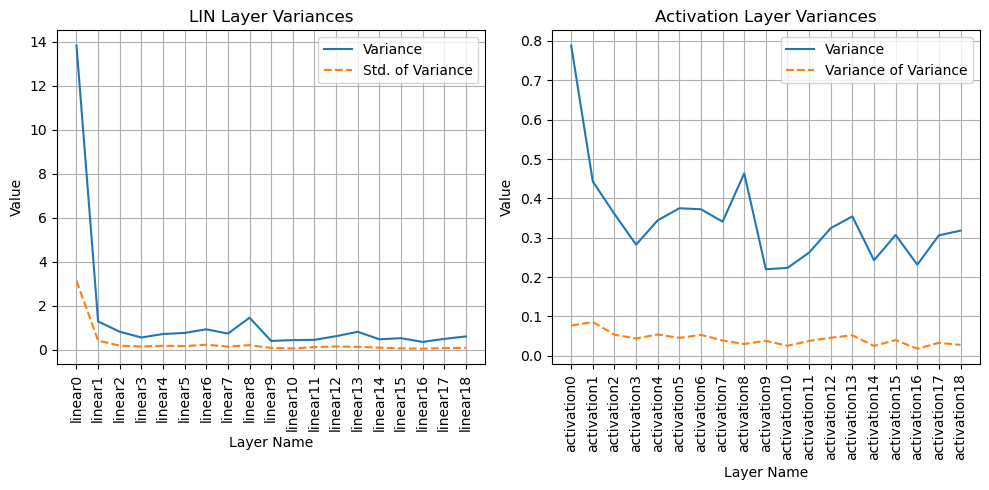

In [6]:
plot_variances_by_layer_type(variances, results, cnn = False, ignore_final_layer=True, std_of_variance = True )

In [7]:
pretrain_train_acc, pretrain_test_acc, pre_trained_model, pretraining_checkpoints = compute_training_acc_epochs(model, dataset_wrapped, params, debug=True, save_checkpoints=True)

Epoch: 0 	Training Accuracy: 62.32%
Validation Accuracy: 62.31%
Epoch: 1 	Training Accuracy: 77.74%
Validation Accuracy: 77.48%
Epoch: 2 	Training Accuracy: 83.30%
Validation Accuracy: 83.03%
Epoch: 3 	Training Accuracy: 87.78%
Validation Accuracy: 86.34%


In [8]:
# Save model state dictionary
torch.save(pre_trained_model.state_dict(), "pretrained_MNIST_model_50-50.pth")
torch.save(pretraining_checkpoints, 'pretrained_MNIST_model_50-50_checkpoints.pth')

In [10]:
results, variances = compute_layer_variances_dense(pre_trained_model, dataset_wrapped.train_loader, device = 'cpu', cnn=False)
for layer_name, stats in results.items():
    print(f"Layer {layer_name} - Variance: {stats['variance']}, Variance of Variance: {stats['variance_of_variance']}")

Layer linear0 - Variance: 14.15507984161377, Variance of Variance: 3.3806872367858887
Layer activation0 - Variance: 0.8074624538421631, Variance of Variance: 0.07535810023546219
Layer linear1 - Variance: 1.4538055658340454, Variance of Variance: 0.3191721439361572
Layer activation1 - Variance: 0.4954480230808258, Variance of Variance: 0.061795275658369064
Layer linear2 - Variance: 1.1225937604904175, Variance of Variance: 0.28151553869247437
Layer activation2 - Variance: 0.40263479948043823, Variance of Variance: 0.047765202820301056
Layer linear3 - Variance: 0.7190777063369751, Variance of Variance: 0.16595126688480377
Layer activation3 - Variance: 0.3258620500564575, Variance of Variance: 0.04968840628862381
Layer linear4 - Variance: 0.6101034879684448, Variance of Variance: 0.1557723432779312
Layer activation4 - Variance: 0.321108341217041, Variance of Variance: 0.05444107949733734
Layer linear5 - Variance: 0.6688110828399658, Variance of Variance: 0.15808700025081635
Layer activati

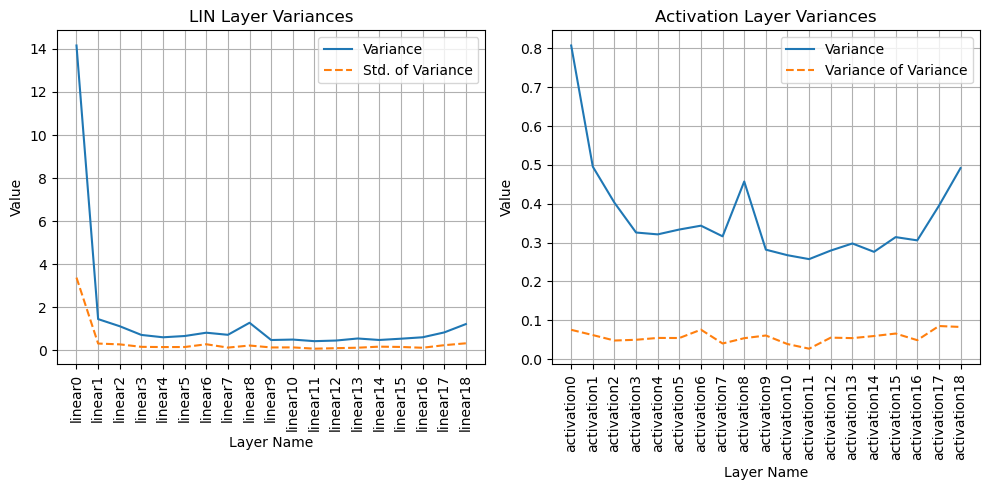

In [11]:
plot_variances_by_layer_type(variances, results, cnn = False, ignore_final_layer=True)

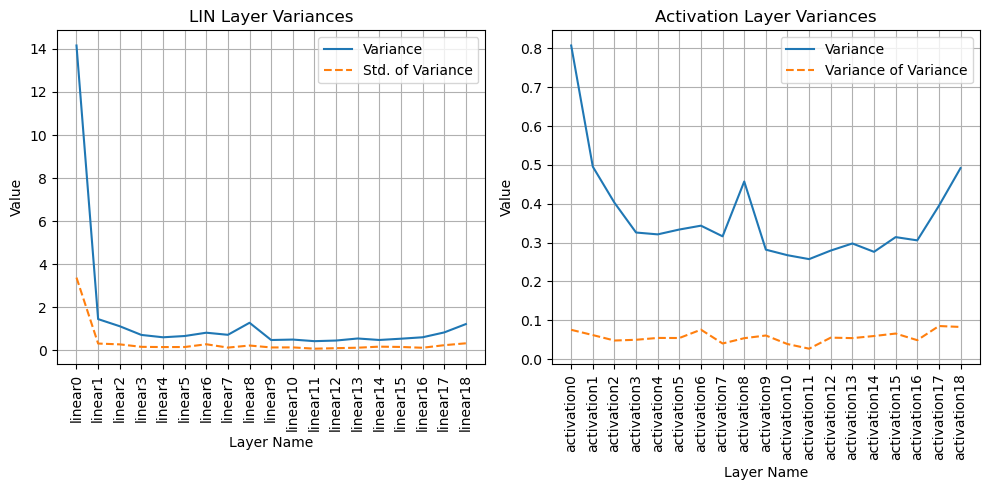

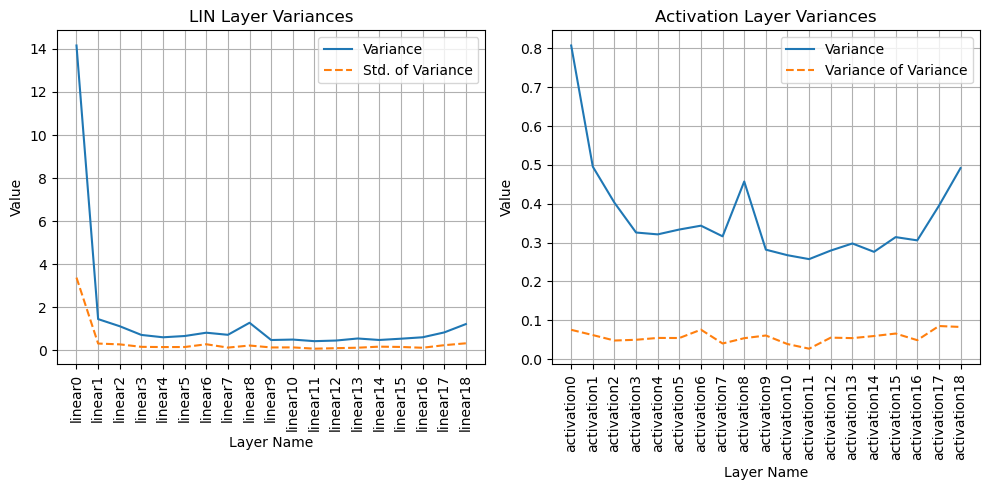

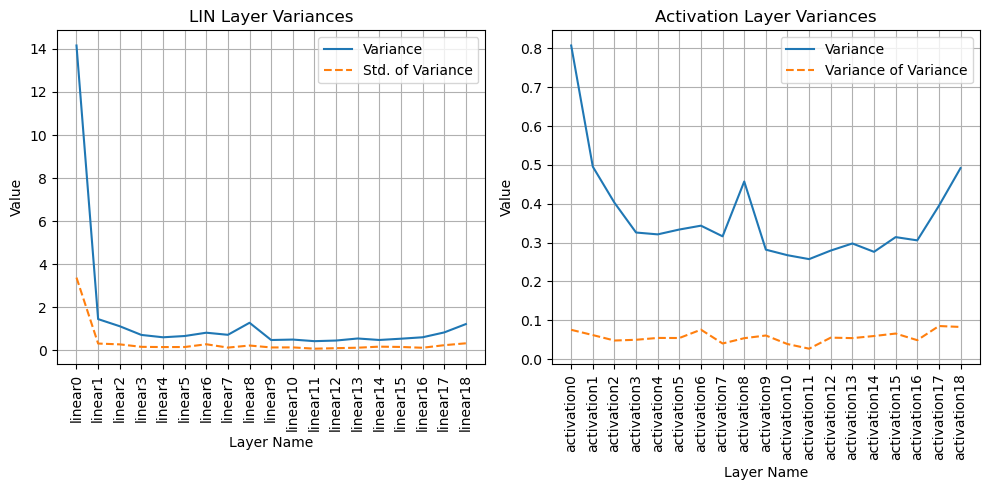

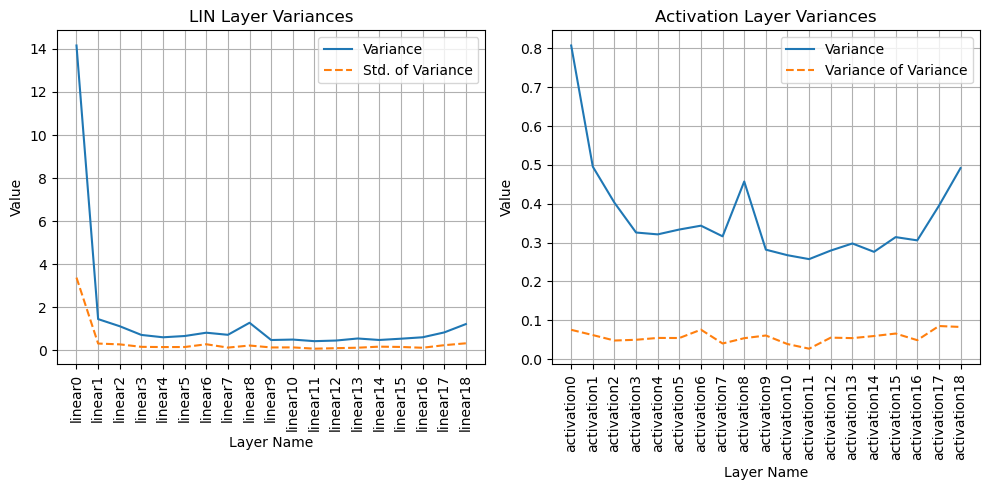

In [12]:
# Assuming your model and dataset variables are already defined
num_pretraining_checkpoints = len(pretraining_checkpoints)

# Create a function to extract variance of variances:
def extract_variance_of_variance_from_names(names, results):
    return [results[name]['variance_of_variance'] for name in names]

# Your original plotting code (for the baseline model) goes here...

model = generate_fc_dnn(dataset.input_dim, dataset.output_dim,
                params).to(device)

# Now, loop through the pretraining_checkpoints
for idx, checkpoint in enumerate(pretraining_checkpoints):
    # Load model state_dict from checkpoint
    model.load_state_dict(checkpoint['model_state_dict'])
    
    # Compute the layer variances for the checkpointed model
    results_checkpoint, variances_checkpoint = compute_layer_variances_dense(model, dataset_wrapped.train_loader, device='cpu', cnn=False)
    
    plot_variances_by_layer_type(variances_checkpoint, results_checkpoint, cnn = False, ignore_final_layer=True)

In [13]:
test_acc = eval(pre_trained_model, device, dataset.pretrain_test_loader, False)
print(f"Test Accuracy on training classes: {test_acc:.2f}")


Test Accuracy on training classes: 0.88


#### finetuning expermient

In [14]:
dataset_wrapped.update_phase('finetune')

In [15]:
results, variances = compute_layer_variances_dense(pre_trained_model, dataset_wrapped.train_loader, device = 'cpu', cnn=False)
for layer_name, stats in results.items():
    print(f"Layer {layer_name} - Variance: {stats['variance']}, Variance of Variance: {stats['variance_of_variance']}")

Layer linear0 - Variance: 12.608515739440918, Variance of Variance: 2.913679361343384
Layer activation0 - Variance: 0.7916527390480042, Variance of Variance: 0.07248929142951965
Layer linear1 - Variance: 1.4208446741104126, Variance of Variance: 0.35405537486076355
Layer activation1 - Variance: 0.4749012589454651, Variance of Variance: 0.07210002839565277
Layer linear2 - Variance: 0.9628971815109253, Variance of Variance: 0.21592479944229126
Layer activation2 - Variance: 0.38333579897880554, Variance of Variance: 0.0465814433991909
Layer linear3 - Variance: 0.6130213141441345, Variance of Variance: 0.14211274683475494
Layer activation3 - Variance: 0.29511943459510803, Variance of Variance: 0.045175548642873764
Layer linear4 - Variance: 0.594781756401062, Variance of Variance: 0.14047738909721375
Layer activation4 - Variance: 0.31647297739982605, Variance of Variance: 0.0533941350877285
Layer linear5 - Variance: 0.6311852931976318, Variance of Variance: 0.14407698810100555
Layer activat

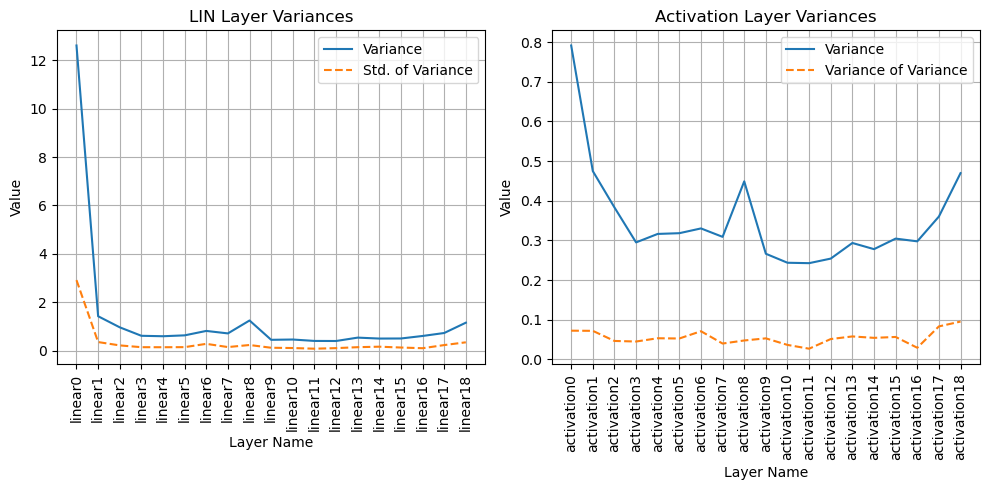

In [16]:
plot_variances_by_layer_type(variances, results, cnn = False, ignore_final_layer=True)

In [17]:
pre_trained_model = generate_fc_dnn(dataset.input_dim, dataset.output_dim,
                params).to(device)

pre_trained_model.load_state_dict(torch.load("pretrained_MNIST_model_50-50.pth"))


<All keys matched successfully>

In [18]:
from tqdm import tqdm

num_experiments = 5
experiments = []

for i in tqdm(range(num_experiments)):
    print('experiment number: ', i)
    cut_models = []
    for cut in range(depth):
        temp = {}
        temp['cut_model'] = cut_model(pre_trained_model, cut_point = cut, freeze = True)
        finetuned_acc, finetuned_test_acc, finetuned_model ,checkpoints_temp = compute_training_acc_epochs(temp['cut_model'], dataset_wrapped, params, debug=True)
        temp['finetuned_acc'] = finetuned_acc
        temp['finetuned_test_acc'] = finetuned_test_acc
        temp['finetuned_model'] = finetuned_model
        temp['checkpoints'] = checkpoints_temp
        cut_models.append(temp)  
    experiments.append(cut_models)

  0%|          | 0/5 [00:00<?, ?it/s]

experiment number:  0
Epoch: 0 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 1 	Training Accuracy: 20.27%
Validation Accuracy: 19.90%
val_acc: 0.1989795918367347, max_val_acc: 0.2227891156462585, no_improve_epochs: 1
Epoch: 2 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 2
Early stopping invoked.
Epoch: 0 	Training Accuracy: 20.10%
Validation Accuracy: 20.37%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 2 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 1
Epoch: 3 	Training Accuracy: 20.10%
Validation Accuracy: 20.37%
val_acc: 0.20374149659863947, max_val_acc: 0.2227891156462585, no_improve_epochs: 2
Early stopping invoked.
Epoch: 0 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156

 20%|██        | 1/5 [03:25<13:41, 205.46s/it]

experiment number:  1
Epoch: 0 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 1
Epoch: 2 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 2
Early stopping invoked.
Epoch: 0 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 1
Epoch: 2 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 2
Early stopping invoked.
Epoch: 0 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 1
Epo

 40%|████      | 2/5 [06:50<10:15, 205.01s/it]

experiment number:  2
Epoch: 0 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 1
Epoch: 2 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 2
Early stopping invoked.
Epoch: 0 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 1
Epoch: 2 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 2
Early stopping invoked.
Epoch: 0 	Training Accuracy: 20.03%
Validation Accuracy: 18.71%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 2 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.22278911564

 60%|██████    | 3/5 [10:19<06:53, 206.98s/it]

experiment number:  3
Epoch: 0 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 1
Epoch: 2 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 2
Early stopping invoked.
Epoch: 0 	Training Accuracy: 20.27%
Validation Accuracy: 19.90%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 2 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 1
Epoch: 3 	Training Accuracy: 20.27%
Validation Accuracy: 19.90%
val_acc: 0.1989795918367347, max_val_acc: 0.2227891156462585, no_improve_epochs: 2
Early stopping invoked.
Epoch: 0 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 1 	Training Accuracy: 20.27%
Validation Accuracy: 19.90%
val_acc: 0.19897959183

 80%|████████  | 4/5 [13:45<03:26, 206.69s/it]

experiment number:  4
Epoch: 0 	Training Accuracy: 20.27%
Validation Accuracy: 19.90%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 2 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 1
Epoch: 3 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 2
Early stopping invoked.
Epoch: 0 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 1
Epoch: 2 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 2
Early stopping invoked.
Epoch: 0 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.22278911564

100%|██████████| 5/5 [17:26<00:00, 209.25s/it]


In [19]:
torch.save(experiments, 'experiments_results_MNIST_50-50.pth')

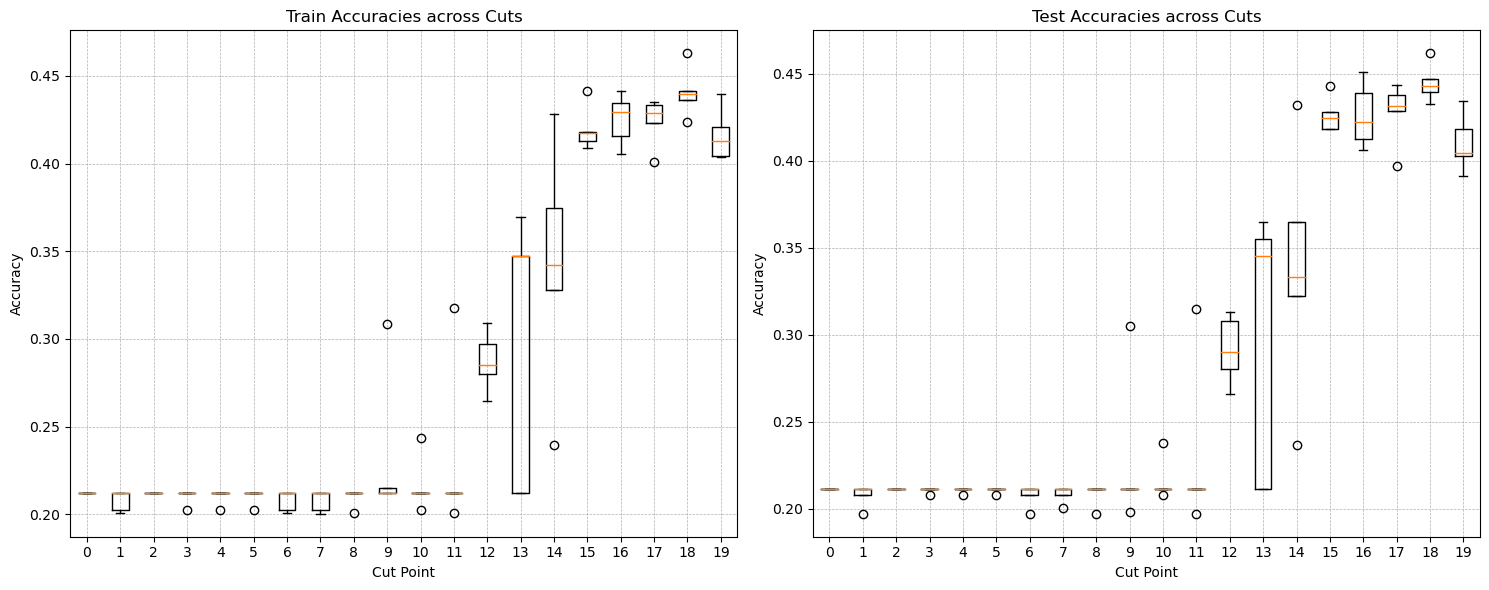

In [20]:
import matplotlib.pyplot as plt

# Initialize lists to store all accuracies for each cut point
train_accuracies = [[] for _ in range(depth)]
test_accuracies = [[] for _ in range(depth)]

# Populate the lists with accuracy values
for cut_models in experiments:
    for cut, model_data in enumerate(cut_models):
        train_accuracies[cut].append(model_data['finetuned_acc'])
        test_accuracies[cut].append(model_data['finetuned_test_acc'])

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot training accuracies
axs[0].boxplot(train_accuracies)
axs[0].set_title('Train Accuracies across Cuts')
axs[0].set_xlabel('Cut Point')
axs[0].set_ylabel('Accuracy')
axs[0].set_xticks(range(1, depth + 1))
axs[0].set_xticklabels(range(depth))
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot test accuracies
axs[1].boxplot(test_accuracies)
axs[1].set_title('Test Accuracies across Cuts')
axs[1].set_xlabel('Cut Point')
axs[1].set_ylabel('Accuracy')
axs[1].set_xticks(range(1, depth + 1))
axs[1].set_xticklabels(range(depth))
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plots
plt.tight_layout()
plt.show()

----

In [19]:
cut_models = []

for cut in range(depth):
    temp = {}
    temp['cut_model'] = cut_model(pre_trained_model, sw = 1.5, sb = 1, cut_point = cut)
    finetuned_train_acc, finetuned_test_acc, finetuned_model = compute_training_acc_epochs(temp['cut_model'], dataset_wrapped, params, debug=True)
    temp['finetuned_train_acc'] = finetuned_train_acc
    temp['finetuned_test_acc'] = finetuned_test_acc
    temp['finetuned_model'] = finetuned_model
    cut_models.append(temp)   

Epoch: 0 	Training Accuracy: 73.21%
Validation Accuracy: 74.49%
Epoch: 1 	Training Accuracy: 83.59%
Validation Accuracy: 83.71%
Epoch: 2 	Training Accuracy: 87.89%
Validation Accuracy: 87.72%
Epoch: 3 	Training Accuracy: 89.93%
Validation Accuracy: 90.00%
Epoch: 0 	Training Accuracy: 57.77%
Validation Accuracy: 58.10%
Epoch: 1 	Training Accuracy: 69.55%
Validation Accuracy: 70.51%
Epoch: 2 	Training Accuracy: 75.39%
Validation Accuracy: 76.80%
Epoch: 3 	Training Accuracy: 79.60%
Validation Accuracy: 80.37%
Epoch: 0 	Training Accuracy: 55.61%
Validation Accuracy: 56.43%
Epoch: 1 	Training Accuracy: 61.05%
Validation Accuracy: 61.56%
Epoch: 2 	Training Accuracy: 64.00%
Validation Accuracy: 65.00%
Epoch: 3 	Training Accuracy: 67.67%
Validation Accuracy: 68.50%
Epoch: 0 	Training Accuracy: 49.88%
Validation Accuracy: 51.22%
Epoch: 1 	Training Accuracy: 55.54%
Validation Accuracy: 57.07%
Epoch: 2 	Training Accuracy: 57.20%
Validation Accuracy: 58.71%
Epoch: 3 	Training Accuracy: 58.77%
Vali

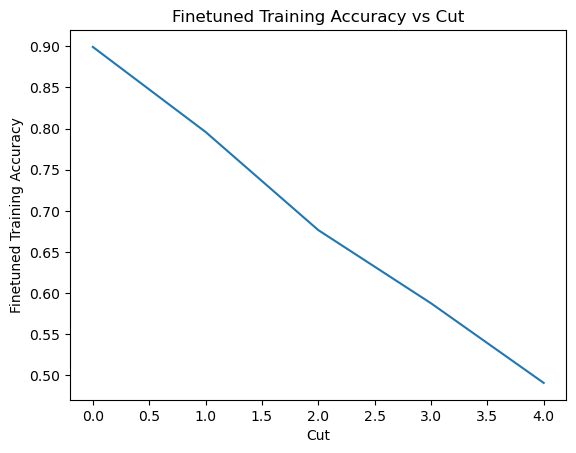

In [20]:
import matplotlib.pyplot as plt

finetuned_accs = [model['finetuned_train_acc'] for model in cut_models]
cuts = range(len(finetuned_accs))
plt.plot(cuts, finetuned_accs)
plt.xlabel('Cut')
plt.ylabel('Finetuned Training Accuracy')
plt.title('Finetuned Training Accuracy vs Cut')
plt.show()

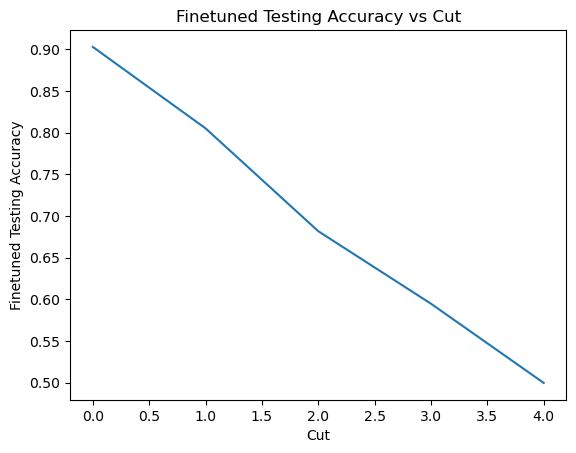

In [21]:
import matplotlib.pyplot as plt

finetuned_accs = [model['finetuned_test_acc'] for model in cut_models]
cuts = range(len(finetuned_accs))
plt.plot(cuts, finetuned_accs)
plt.xlabel('Cut')
plt.ylabel('Finetuned Testing Accuracy')
plt.title('Finetuned Testing Accuracy vs Cut')
plt.show()

-----

## Fashion Mnist

### Baseline, end to end trained model

In [4]:
batch_size = 128
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = 'mps'
depth = 5

fashion_dataset = FashionMNISTtrainer(batch_size)
params = dict(device=device,
                width=50, lr=0.01, num_train=4,
                sb=1, depth= depth, sw=1.5)

fashion_model = generate_fc_dnn(dataset.input_dim, dataset.output_dim,
                params['depth'], params['width']).to(device)

pretrain_acc, pre_trained_model = compute_training_acc_epochs(fashion_model, fashion_dataset, params, debug=True)

Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): Tanh()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): Tanh()
  (4): Linear(in_features=50, out_features=50, bias=True)
  (5): Tanh()
  (6): Linear(in_features=50, out_features=50, bias=True)
  (7): Tanh()
  (8): Linear(in_features=50, out_features=10, bias=True)
  (9): LogSoftmax(dim=1)
) SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

Train set: Average loss: 0.8191, Accuracy: 42975.0/60000 (72%)

Epoch: 0 	Training Accuracy: 71.62%

Train set: Average loss: 0.6768, Accuracy: 45237.0/60000 (75%)

Epoch: 1 	Training Accuracy: 75.39%

Train set: Average loss: 0.6093, Accuracy: 46827.0/60000 (78%)

Epoch: 2 	Training Accuracy: 78.05%

Train set: Average loss: 0.5691, Accuracy: 47610.0/60000 (79%)

Epoch: 3 	Training Accuracy: 79.35%

Train set: Average loss: 0.5691, 

### finetuned staring from regular mnist 

In [6]:
#luckily, the number of classes is the same, so we don't need to change the last layer.

cut_models = []

for cut in range(depth):
    temp = {}
    temp['cut_model'] = cut_model(model, sw = 1.5, sb = 1, cut_point = cut)
    finetuned_acc, finetuned_model = compute_training_acc_epochs(temp['cut_model'], fashion_dataset, params, debug=False)
    temp['finetuned_acc'] = finetuned_acc
    temp['finetuned_model'] = finetuned_model
    cut_models.append(temp)   

In [9]:
from pprint import pprint

for i, mod in enumerate(cut_models):
    print(f"Cut {i}:")
    pprint(mod['finetuned_acc'])

Cut 0:
0.7911
Cut 1:
0.7381833333333333
Cut 2:
0.6858333333333333
Cut 3:
0.6187833333333334
Cut 4:
0.27591666666666664


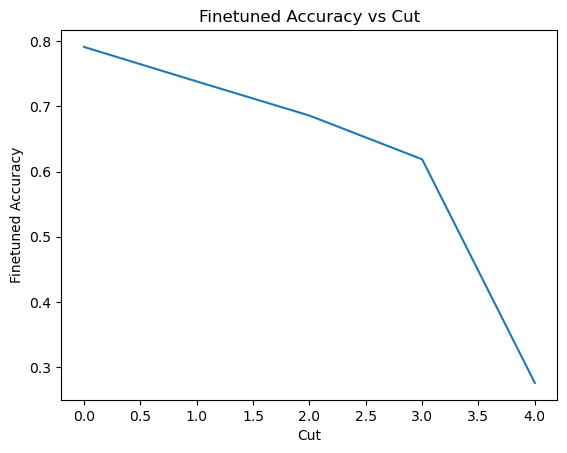

In [7]:
import matplotlib.pyplot as plt

finetuned_accs = [model['finetuned_acc'] for model in cut_models]
cuts = range(len(finetuned_accs))
plt.plot(cuts, finetuned_accs)
plt.xlabel('Cut')
plt.ylabel('Finetuned Accuracy')
plt.title('Finetuned Accuracy vs Cut')
plt.show()

----